<a href="https://colab.research.google.com/github/AnuragGorkar/CNN_CIFAR10_Image_Classification/blob/master/CNN_CIFAR10_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# CIFAR-10 MULTICLASS CLASSIFICATION 



In [0]:
import pandas as pd
import numpy as np

-----

# LOADING DATA


In [0]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
x_train[0].shape

(32, 32, 3)

In [0]:
import matplotlib.pyplot as plt

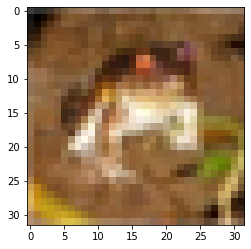

In [0]:
plt.imshow(x_train[0])

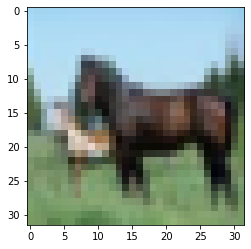

In [0]:
plt.imshow(x_train[12])

# PRE-PROCESSING THE DATA 

In [0]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [0]:
x_train[0].shape

(32, 32, 3)

In [0]:
x_train.max()

255

In [0]:
x_train = x_train/225

In [0]:
x_test = x_test/255

In [0]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
x_test.shape

(10000, 32, 32, 3)

#LABELS

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_train.shape

(50000, 1)

In [0]:
y_train[0]

array([6], dtype=uint8)

In [0]:
y_cat_train = to_categorical(y_train,10)

In [0]:
y_cat_train.shape

(50000, 10)

In [0]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [0]:
y_cat_test = to_categorical(y_test,10)

# BUILDING THE MODEL

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [0]:
model = Sequential()


model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [0]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 8s 166us/sample - loss: 0.5220 - acc: 0.8249 - val_loss: 1.0560 - val_acc: 0.6917
Epoch 2/15
50000/50000 [==============================] - 8s 162us/sample - loss: 0.4934 - acc: 0.8353 - val_loss: 1.1242 - val_acc: 0.6682
Epoch 3/15
50000/50000 [==============================] - 8s 160us/sample - loss: 0.4762 - acc: 0.8411 - val_loss: 1.4969 - val_acc: 0.6478
Epoch 4/15
50000/50000 [==============================] - 8s 161us/sample - loss: 0.4543 - acc: 0.8500 - val_loss: 1.3283 - val_acc: 0.6779


In [0]:
losses = pd.DataFrame(model.history.history)

In [0]:
losses.head()

,loss,acc,val_loss,val_acc
0,0.521965,0.82490,1.055979,0.6917
1,0.493396,0.83530,1.124153,0.6682
2,0.476165,0.84114,1.496886,0.6478
3,0.454307,0.85004,1.328250,0.6779


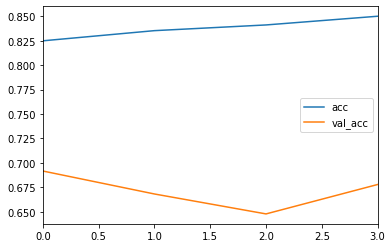

In [0]:
losses[['acc','val_acc']].plot()

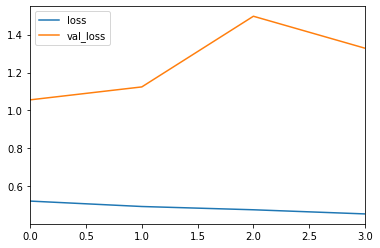

In [0]:
losses[['loss','val_loss']].plot()

In [0]:
model.metrics_names

['loss', 'acc']

In [0]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'acc']
[1.3282504731178284, 0.6779]


In [0]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict_classes(x_test)

In [0]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73      1000
           1       0.79      0.80      0.80      1000
           2       0.58      0.61      0.59      1000
           3       0.57      0.40      0.47      1000
           4       0.54      0.73      0.62      1000
           5       0.54      0.63      0.58      1000
           6       0.85      0.60      0.70      1000
           7       0.76      0.73      0.74      1000
           8       0.72      0.84      0.77      1000
           9       0.75      0.77      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [0]:
confusion_matrix(y_test,predictions)

array([[680,  29,  51,   8,  53,  15,   5,  15, 108,  36],
       [ 18, 799,  14,   6,  13,   9,   5,   3,  40,  93],
       [ 51,   7, 614,  38, 116,  77,  25,  34,  27,  11],
       [ 23,  19,  87, 397, 122, 224,  29,  47,  27,  25],
       [ 10,   3,  70,  35, 731,  42,  16,  61,  23,   9],
       [  9,   5,  82, 113,  78, 626,  15,  41,  15,  16],
       [  8,  15,  81,  72, 116,  62, 596,  13,  21,  16],
       [  8,   5,  39,  18,  95,  69,   4, 729,  13,  20],
       [ 42,  34,   9,  11,  11,  11,   7,   6, 838,  31],
       [ 16,  90,  19,   4,  16,  16,   2,  14,  54, 769]])

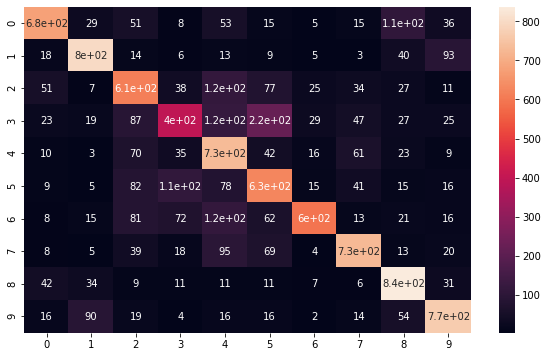

In [0]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

# PREDICTION

In [0]:
my_image = x_test[16]

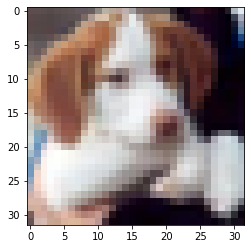

In [0]:
plt.imshow(my_image)

In [0]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([5])

In [0]:
my_image = x_test[7]

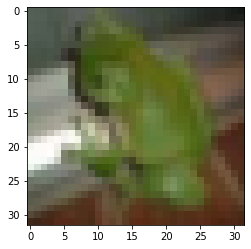

In [0]:
plt.imshow(my_image)

In [0]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([6])